# Loan data from prosper
## by Swathi P

## Investigation Overview

In this data analysis we will be looking at factors which affect a loan’s outcome status.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.We will be looking into the following factors for predicting loan status outcome like LoanStatus, EmploymentStatus, BorrowerAPR,ProsperScore,DebtToIncomeRatio,  LoanOriginalAmount, IncomeRange, IsBorrowerHomeowner and IncomeVerifiable.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_master=pd.read_csv('prosperLoanData.csv')
df=df_master.copy()

def status_group(data):
    '''Takes data and checks if there is past and will return as Past Due else if FinalPaymentInProgress returns as completed else data as is'''
    if 'Past' in data:
        return 'Past Due'
    elif 'FinalPaymentInProgress' in data:
        return 'Completed'
    else:
        return data
    
df.LoanStatus=df.LoanStatus.apply(status_group)

#There are only 5 entries for cancelled status,so removing those from our dataframe
df=df[df.LoanStatus!='Cancelled'] 
df.LoanStatus.value_counts()  
#filling nan values
df['EmploymentStatus'].fillna(value='Not available',inplace=True);

## Relationship between LoanStatus and ProsperScore

A Prosper score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

ProsperScores are low for PastDue loans and higher for completed loans.

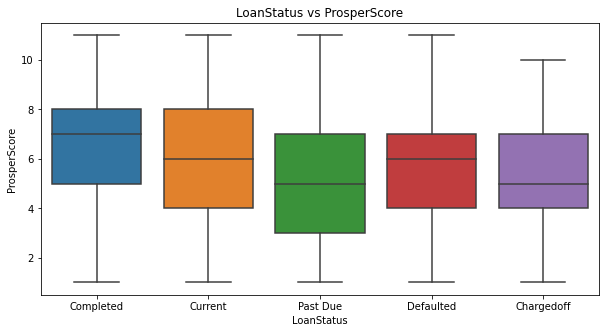

In [3]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='ProsperScore');
plt.title('LoanStatus vs ProsperScore');

## Relationship between LoanStatus and DebtToIncomeRatio

PastDue,Defaulted and Chargedoff loans have higher DebtToIncomeRatio than current and completed.Completed loans have lower DebtToIncomeRatio.

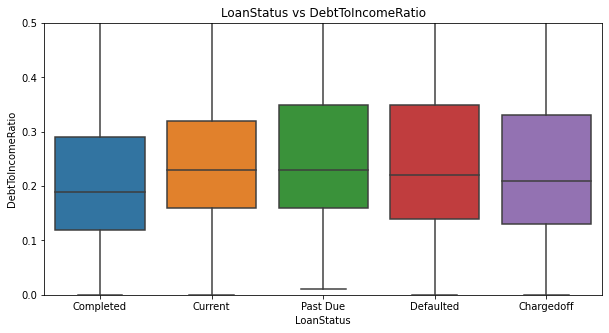

In [4]:
plt.figure(figsize=[10,5])
sb.boxplot(data=df,x='LoanStatus',y='DebtToIncomeRatio');
plt.ylim(0,0.5);
plt.title('LoanStatus vs DebtToIncomeRatio');

## LoanStatus vs EmploymentStatus and BorrowerAPR

For completed and current loans, borrowers who are employed have lower Borrower APR compartively than others. PastDue loans have higher borrower apr,especially for those whose employment status is others and not employed. In contrast to completed loans,for Defaulted loans,employed borrowers have higher Borrower APR. Chargedoff loans also have higher Borrower APR,mainly for borrowers who are employed and not employed.

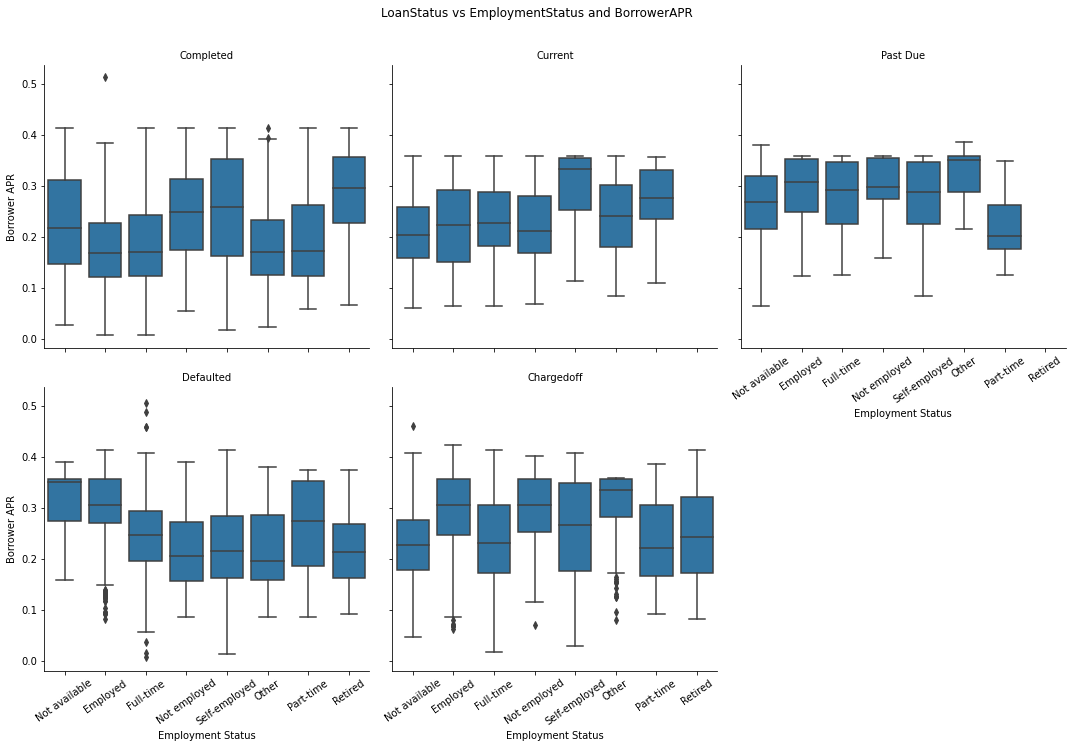

In [5]:
g=sb.FacetGrid(data=df,col='LoanStatus',col_wrap=3,size=5,margin_titles=True)
g.map(sb.boxplot,'EmploymentStatus','BorrowerAPR');
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(35);
plt.suptitle('LoanStatus vs EmploymentStatus and BorrowerAPR');
g.set_titles('{col_name}')
g.set_xlabels('Employment Status');
g.set_ylabels('Borrower APR');
plt.subplots_adjust(top=0.9);

## LoanStatus vs LoanOriginalAmount and IsBorrowerHomeowner

we can interpret that for every loan status category borrowers who own homes have higher loan amounts than borrowers who doesn't own homes.Current loans have high loan amounts.

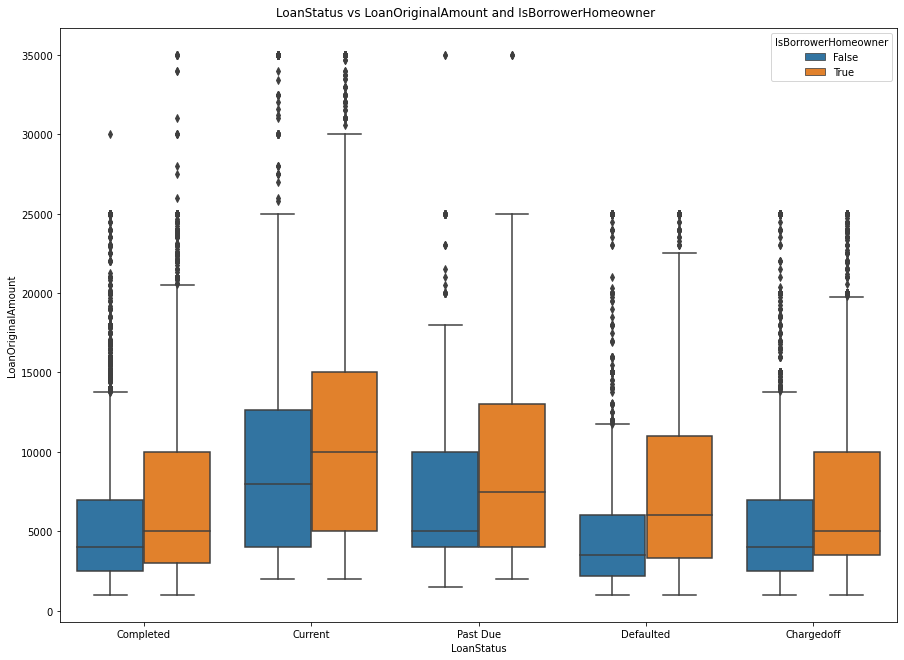

In [6]:
plt.figure(figsize=[15,10])
sb.boxplot(data=df,x='LoanStatus',y='LoanOriginalAmount',hue='IsBorrowerHomeowner');
plt.suptitle('LoanStatus vs LoanOriginalAmount and IsBorrowerHomeowner');
plt.subplots_adjust(top=0.95);